# Respiratory disease mortality data

We will load data on age-standardized mortality rate for both sexes combined (deaths per 100,000 population).

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\alexb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\alexb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\alexb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [11]:
resp_filepath = "../data/us/respiratory_disease/IHME_USA_COUNTY_RESP_DISEASE_MORTALITY_1980_2014_NATIONAL_Y2017M09D26.XLSX" 

def load_resp_disease_sheet():
    # Load just the overall respiratory mortality rates for 2014
    filepath = resp_filepath
    orig_data = pd.read_excel(filepath,
                              sheet_name = "Chronic respiratory diseases",
                              skiprows = 1,
                              skipfooter = 2)
    orig_data = orig_data.dropna(subset = ["FIPS"])
    # omit the confidence intervals for now
    resp_mortality = orig_data['Mortality Rate, 2014*'].str.split(expand = True).iloc[:, 0]
    data = pd.DataFrame({'countyFIPS': orig_data['FIPS'].astype(int), 
                         'Respiratory Mortality': resp_mortality})
    return data

def load_all_resp_disease_sheets():
    # Load the respiratory mortality rates split by disease for 2014
    filepath = resp_filepath
    xl = pd.ExcelFile(filepath)
    all_data = None
    for i, sheet_name in enumerate(xl.sheet_names):
        disease_name = sheet_name
        if i == 0:
            # all diseases
            disease_name = 'All chronic respiratory diseases'
        
        print('Loading the sheet for', disease_name)
        
        orig_data = xl.parse(sheet_name, skiprows = 1, skifooter = 2)    
        orig_data = orig_data.dropna(subset = ["FIPS"])        
        # omit the confidence intervals for now
        resp_mortality = orig_data['Mortality Rate, 2014*'].str.split(expand = True).iloc[:, 0]
        col_name = disease_name + ' mortality'
        data = pd.DataFrame({'countyFIPS': orig_data['FIPS'].astype(int), 
                             col_name: resp_mortality})
        # Combine the data
        if all_data is None:
            all_data = data
        else:
            all_data = all_data.merge(data, left_on='countyFIPS', right_on='countyFIPS')
    return all_data

In [12]:
df = load_all_resp_disease_sheets()

Loading the sheet for All chronic respiratory diseases
Loading the sheet for Chronic obstructive pulmonary 
Loading the sheet for Pneumoconiosis
Loading the sheet for Silicosis
Loading the sheet for Asbestosis
Loading the sheet for Coal workers pneumoconiosis
Loading the sheet for Other pneumoconiosis
Loading the sheet for Asthma
Loading the sheet for Interstitial lung disease
Loading the sheet for Other chronic respiratory 


In [24]:
# Convert columns to float, as they are loaded as object by default
df = df.astype(np.float)

In [17]:
df.shape

(3193, 11)

In [28]:
df.describe()

,countyFIPS,All chronic respiratory diseases mortality,Chronic obstructive pulmonary mortality,Pneumoconiosis mortality,Silicosis mortality,Asbestosis mortality,Coal workers pneumoconiosis mortality,Other pneumoconiosis mortality,Asthma mortality,Interstitial lung disease mortality,Other chronic respiratory mortality
count,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000
mean,29898.810836,63.655662,55.254212,0.675193,0.038086,0.212014,0.184707,0.240482,1.257448,5.585875,0.882853
std,15514.993121,16.881974,16.187117,1.330763,0.101880,0.320250,1.241403,0.075142,0.390768,1.113304,0.180589
min,1.000000,14.270000,9.940000,0.100000,0.000000,0.020000,0.000000,0.060000,0.490000,2.750000,0.290000
25%,18101.000000,52.060000,43.850000,0.370000,0.010000,0.090000,0.010000,0.190000,1.020000,4.840000,0.770000
50%,29125.000000,62.290000,53.860000,0.470000,0.020000,0.140000,0.030000,0.230000,1.170000,5.430000,0.870000
75%,45055.000000,73.270000,64.690000,0.640000,0.040000,0.240000,0.070000,0.280000,1.410000,6.160000,0.980000
max,56045.000000,160.970000,152.290000,43.450000,4.120000,10.810000,42.390000,0.670000,4.120000,14.930000,2.160000


We can see here that COPD (chronic obstructive pulmonary disease) is the greatest contributor to mortality, followed by interstitial lung disease. COPD is known to be heavily correlated to smoking, so more analysis needs to be done to see if it correlates with other health indicators

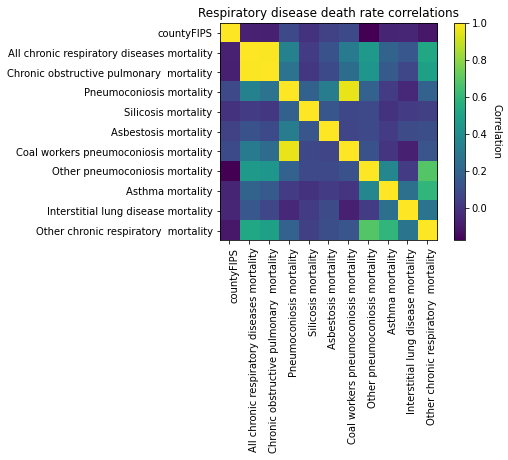

In [36]:
n_cols = len(df.columns)
fig, ax = plt.subplots()
im = ax.imshow(df.corr())

# We want to show all ticks...
ax.set_xticks(np.arange(n_cols))
ax.set_yticks(np.arange(n_cols))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

ax.set_title("Respiratory disease death rate correlations")
plt.show()

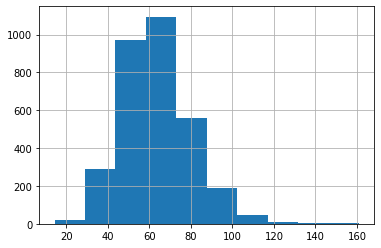

In [37]:
df['All chronic respiratory diseases mortality'].hist()